In [4]:
# ==============================================
# STEP 1: DATA LOADING & CLEANING
# ==============================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats

In [5]:
# Paths
raw_file = r"C:\Desktop\Thesis_Projects\data\synthetic_screen_time_500k.csv"
save_path = r"C:\Desktop\Thesis_Projects\visualizations"
cleaned_file = r"C:\Desktop\Thesis_Projects\data\cleaned_screen_time.csv"
os.makedirs(save_path, exist_ok=True)

In [6]:
# Load raw data
df = pd.read_csv(raw_file)

print(f"✅ Raw Data Shape: {df.shape}")
print("✅ Columns:", df.columns.tolist())

✅ Raw Data Shape: (500000, 25)
✅ Columns: ['user_id', 'age', 'gender', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'stress_level', 'physical_activity_hours_per_week', 'location_type', 'mental_health_score', 'uses_wellness_apps', 'eats_healthy', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score', 'mindfulness_minutes_per_day']


In [7]:
# ------------ CLEANING ------------
# ✅ Keep only Male & Female (Remove "Others")
df = df[df["gender"].isin(["Male", "Female"])]

In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)


In [9]:
# Drop rows with critical missing values
critical_cols = ["daily_screen_time_hours", "age", "sleep_duration_hours", "stress_level", "mental_health_score"]
df.dropna(subset=critical_cols, inplace=True)

In [10]:
# Remove impossible or extreme outliers (basic cleaning)
df = df[(df["daily_screen_time_hours"] > 0) & (df["daily_screen_time_hours"] <= 16)]
df = df[(df["age"] >= 10) & (df["age"] <= 80)]
df = df[(df["sleep_duration_hours"] > 0) & (df["sleep_duration_hours"] <= 15)]

In [11]:
# Fill remaining missing numeric values with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\Vivke\AppData\Local\Temp\ipykernel_484\2435054341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Vivke\AppData\Local\Temp\ipykernel_484\2435054341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [12]:
# Derived Columns
df["screen_sleep_ratio"] = df["daily_screen_time_hours"] / df["sleep_duration_hours"]
df["total_device_usage"] = df[
    ["phone_usage_hours", "laptop_usage_hours", "tablet_usage_hours", "tv_usage_hours"]
].sum(axis=1)
df["screen_time_group"] = pd.cut(
    df["daily_screen_time_hours"], bins=[0,4,8,16], labels=["Low","Moderate","High"]
)

In [13]:
# Save cleaned data
df.to_csv(cleaned_file, index=False)
print(f"✅ Cleaned Data Shape (Male & Female Only): {df.shape}")
print(f"✅ Cleaned data saved at: {cleaned_file}")

✅ Cleaned Data Shape (Male & Female Only): (478276, 28)
✅ Cleaned data saved at: C:\Desktop\Thesis_Projects\data\cleaned_screen_time.csv


In [14]:
# ==============================================
# STEP 2: HELPER FUNCTION TO SAVE FIGURES
# ==============================================

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.1)

def save_fig(name):
    plt.savefig(os.path.join(save_path, f"{name}.png"), dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {name}.png")

✅ Saved: hist_daily_screen_time.png


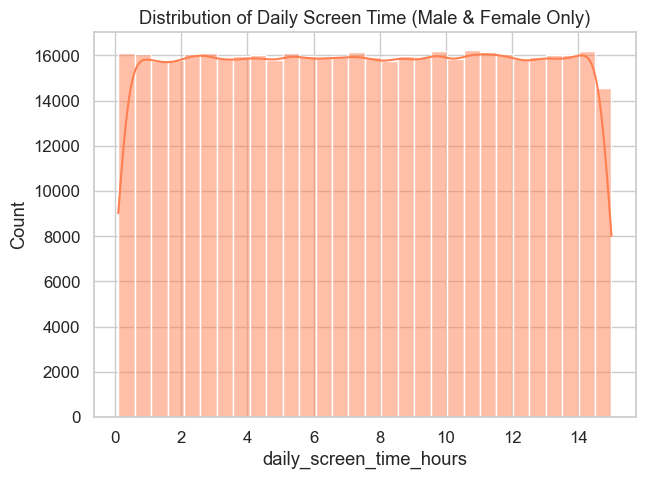

In [15]:
# ==============================================
# STEP 3: DESCRIPTIVE VISUALIZATIONS (USING CLEANED DATA)
# ==============================================

# Histogram - Daily Screen Time
plt.figure(figsize=(7,5))
sns.histplot(df["daily_screen_time_hours"], bins=30, kde=True, color="coral")
plt.title("Distribution of Daily Screen Time (Male & Female Only)")
save_fig("hist_daily_screen_time")
plt.show()

✅ Saved: kde_age_distribution.png


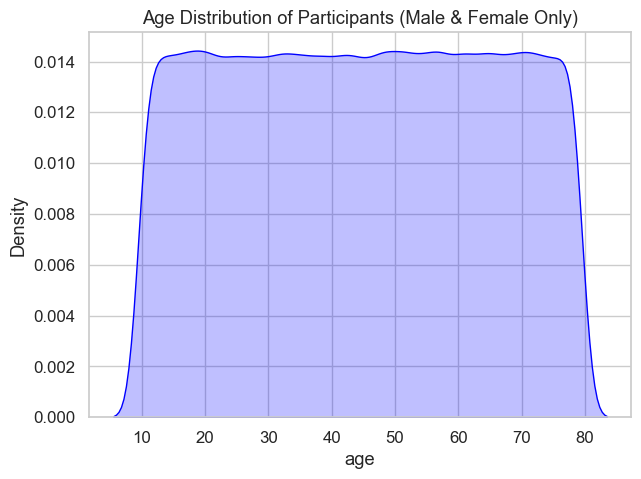

In [17]:
# KDE - Age Distribution
plt.figure(figsize=(7,5))
sns.kdeplot(df["age"], fill=True, color="blue")
plt.title("Age Distribution of Participants (Male & Female Only)")
save_fig("kde_age_distribution")
plt.show()

C:\Users\Vivke\AppData\Local\Temp\ipykernel_484\3097393474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="daily_screen_time_hours", data=df, palette="Set2")


✅ Saved: boxplot_gender_screen_time.png


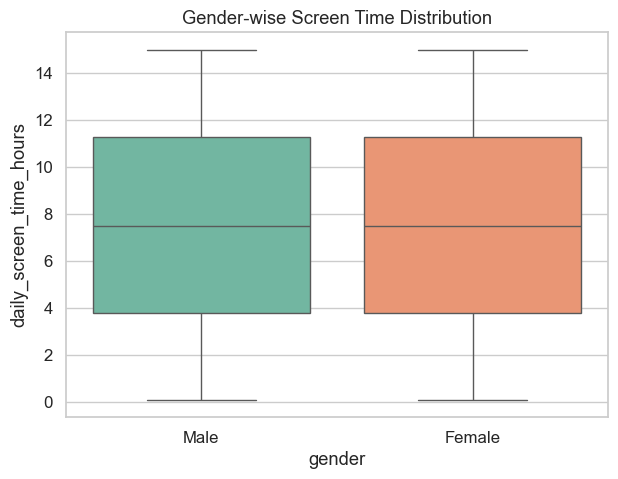

In [18]:
# Boxplot - Gender vs Screen Time
plt.figure(figsize=(7,5))
sns.boxplot(x="gender", y="daily_screen_time_hours", data=df, palette="Set2")
plt.title("Gender-wise Screen Time Distribution")
save_fig("boxplot_gender_screen_time")
plt.show()

C:\Users\Vivke\AppData\Local\Temp\ipykernel_484\834878351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="location_type", y="stress_level", data=df, palette="muted")


✅ Saved: violin_location_stress.png


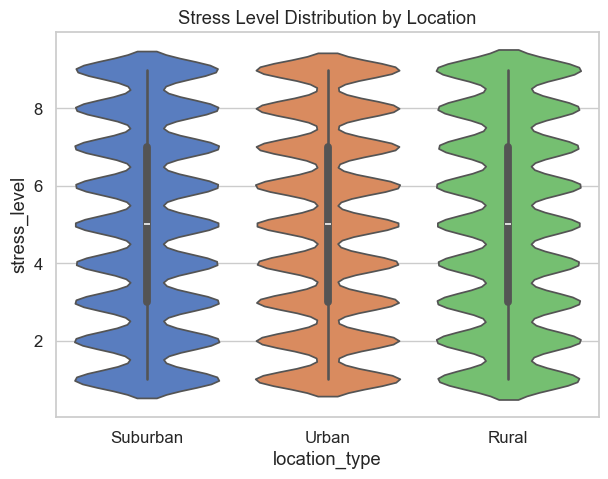

In [19]:
# Violin Plot - Location vs Stress Level
plt.figure(figsize=(7,5))
sns.violinplot(x="location_type", y="stress_level", data=df, palette="muted")
plt.title("Stress Level Distribution by Location")
save_fig("violin_location_stress")
plt.show()

✅ Saved: countplot_screen_groups_gender.png


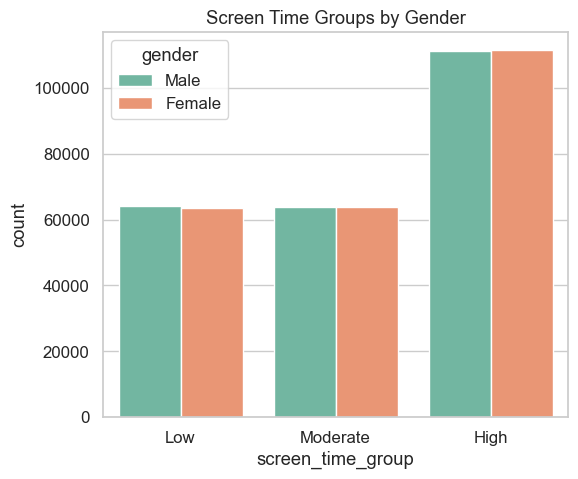

In [20]:
# Countplot - Screen Time Groups by Gender
plt.figure(figsize=(6,5))
sns.countplot(x="screen_time_group", hue="gender", data=df, palette="Set2")
plt.title("Screen Time Groups by Gender")
save_fig("countplot_screen_groups_gender")
plt.show()

C:\Users\Vivke\AppData\Local\Temp\ipykernel_484\1115379405.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="location_type", y="mental_health_score", data=df, ci="sd", palette="muted")
C:\Users\Vivke\AppData\Local\Temp\ipykernel_484\1115379405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="location_type", y="mental_health_score", data=df, ci="sd", palette="muted")


✅ Saved: barplot_mental_health_location.png


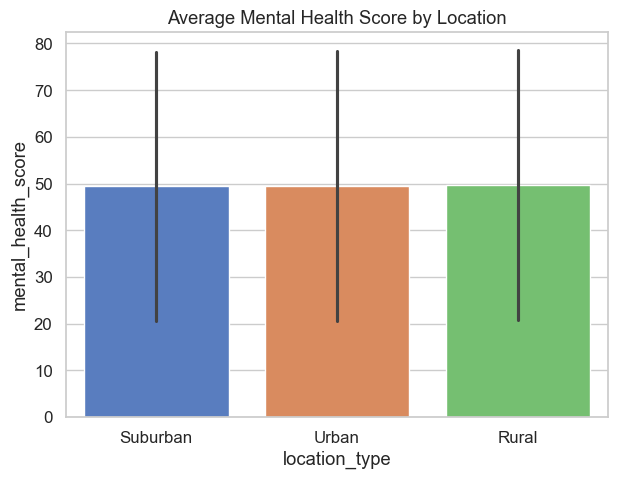

In [21]:
# Barplot - Avg Mental Health Score by Location
plt.figure(figsize=(7,5))
sns.barplot(x="location_type", y="mental_health_score", data=df, ci="sd", palette="muted")
plt.title("Average Mental Health Score by Location")
save_fig("barplot_mental_health_location")
plt.show()

✅ Saved: heatmap_correlation.png


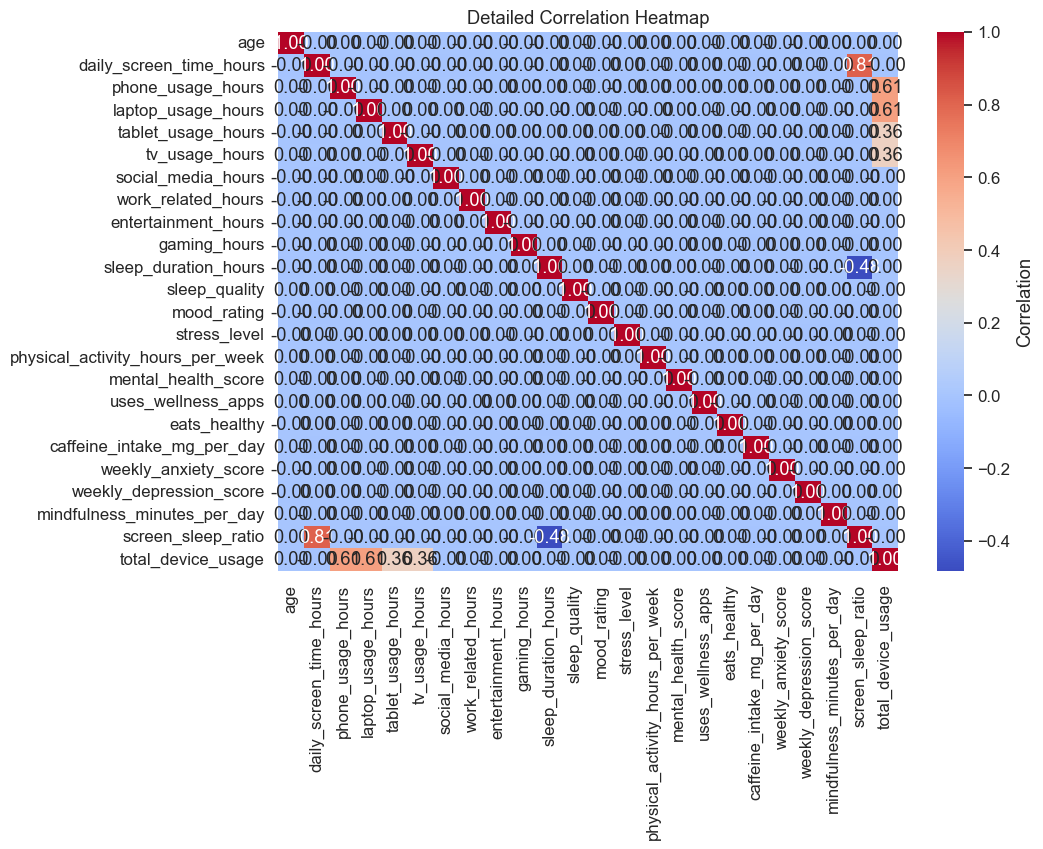

In [22]:
# ==============================================
# STEP 4: RELATIONSHIP & CORRELATION VISUALIZATIONS
# ==============================================

# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),
            annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label':'Correlation'})
plt.title("Detailed Correlation Heatmap")
save_fig("heatmap_correlation")
plt.show()


✅ Saved: pairplot_key_variables.png


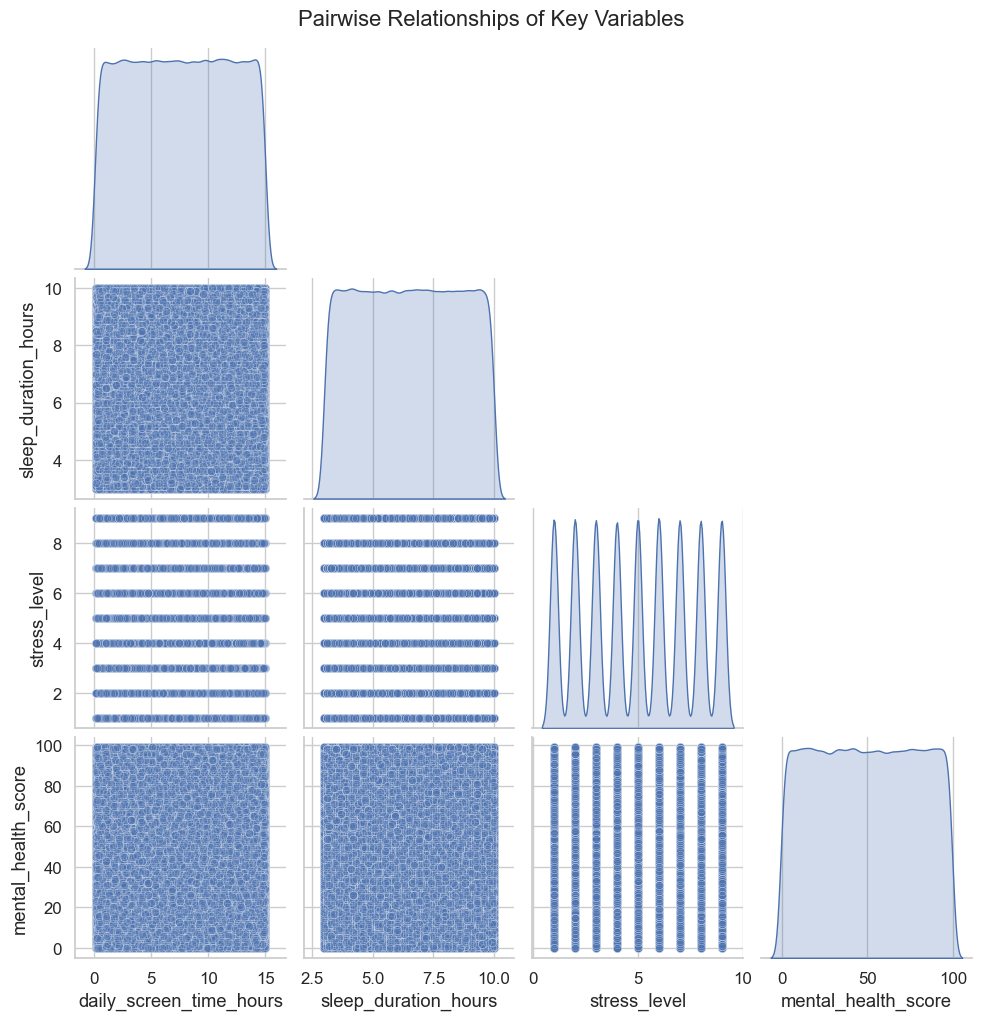

In [23]:
# Pairplot - Key Behavioral Variables
sns.pairplot(df[["daily_screen_time_hours","sleep_duration_hours","stress_level","mental_health_score"]],
             diag_kind="kde", corner=True, plot_kws={'alpha':0.3})
plt.suptitle("Pairwise Relationships of Key Variables", y=1.02)
save_fig("pairplot_key_variables")
plt.show()

✅ Saved: regression_screen_mental_health.png


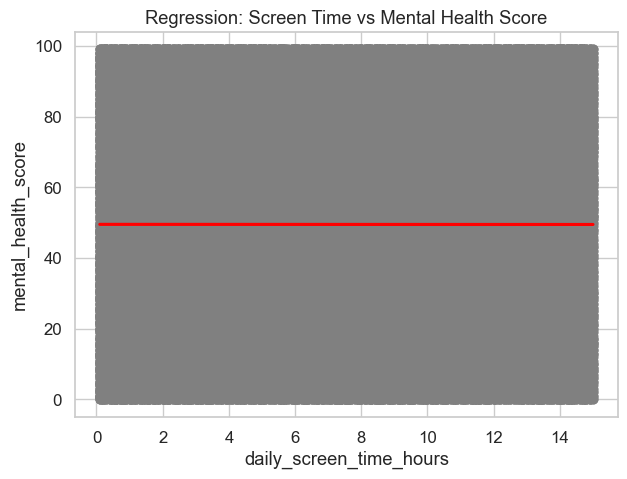

In [24]:
# Regression - Screen Time vs Mental Health
plt.figure(figsize=(7,5))
sns.regplot(x="daily_screen_time_hours", y="mental_health_score",
            data=df, scatter_kws={'alpha':0.2, 'color':'grey'},
            line_kws={'color':'red'})
plt.title("Regression: Screen Time vs Mental Health Score")
save_fig("regression_screen_mental_health")
plt.show()

✅ Saved: kde_sleep_screen_groups.png


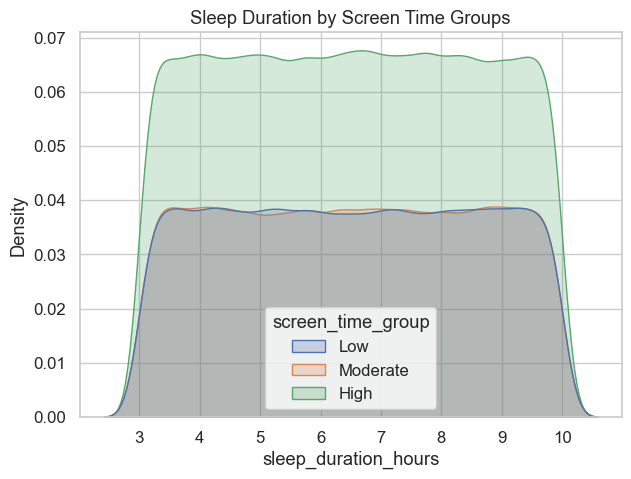

In [26]:
# KDE - Sleep Duration by Screen Time Groups
plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="sleep_duration_hours", hue="screen_time_group", fill=True)
plt.title("Sleep Duration by Screen Time Groups")
save_fig("kde_sleep_screen_groups")
plt.show()

In [28]:
# ==============================================
# STEP 5: STATISTICAL TESTS (APA STYLE)
# ==============================================

male = df[df["gender"]=="Male"]["daily_screen_time_hours"]
female = df[df["gender"]=="Female"]["daily_screen_time_hours"]

t_stat, p_val = stats.ttest_ind(male, female, equal_var=False)
cohens_d = (male.mean() - female.mean()) / np.sqrt((male.std()**2 + female.std()**2) / 2)

anova_res = stats.f_oneway(
    df[df["location_type"]=="Urban"]["daily_screen_time_hours"],
    df[df["location_type"]=="Suburban"]["daily_screen_time_hours"],
    df[df["location_type"]=="Rural"]["daily_screen_time_hours"]
)
eta_sq = (anova_res.statistic * (len(df)-3)) / (
    anova_res.statistic*(len(df)-3) + (len(df)-3)
)

results_text = (
    "APA-STYLE STATISTICAL RESULTS (Male & Female Only):\n"
    f"T-test: t = {t_stat:.2f}, p = {p_val:.4f}, Cohen's d = {cohens_d:.2f}\n"
    f"ANOVA: F = {anova_res.statistic:.2f}, p = {anova_res.pvalue:.4f}, Eta² = {eta_sq:.2f}"
)

with open(os.path.join(save_path, "statistical_results.txt"), "w", encoding="utf-8") as f:
    f.write(results_text)

print(results_text)


APA-STYLE STATISTICAL RESULTS (Male & Female Only):
T-test: t = -0.90, p = 0.3707, Cohen's d = -0.00
ANOVA: F = 0.33, p = 0.7212, Eta² = 0.25


In [29]:
# ==============================================
# STEP 6: SUMMARY TABLES (SAVED)
# ==============================================

# Top Correlated Variables Table
top_corr = df.select_dtypes(include=[np.number]).corr()["daily_screen_time_hours"]\
             .sort_values(key=abs, ascending=False)[1:6]
top_corr.to_csv(os.path.join(save_path, "table_top_correlations.csv"))

# Group-wise Mean Table (Gender x Screen Time Group)
group_table = df.groupby(["gender","screen_time_group"])[
    ["daily_screen_time_hours","stress_level","mental_health_score"]].mean().round(2)
group_table.to_csv(os.path.join(save_path, "table_groupwise_means.csv"))

print("\n✅ Tables saved as CSV in visualization folder")


✅ Tables saved as CSV in visualization folder


C:\Users\Vivke\AppData\Local\Temp\ipykernel_484\994088510.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_table = df.groupby(["gender","screen_time_group"])[
